In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
train = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')

In [3]:
train.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3069 entries, 0 to 3068
Data columns (total 13 columns):
Customer Id           3069 non-null object
YearOfObservation     3069 non-null int64
Insured_Period        3069 non-null float64
Residential           3069 non-null int64
Building_Painted      3069 non-null object
Building_Fenced       3069 non-null object
Garden                3065 non-null object
Settlement            3069 non-null object
Building Dimension    3056 non-null float64
Building_Type         3069 non-null int64
Date_of_Occupancy     2341 non-null float64
NumberOfWindows       3069 non-null object
Geo_Code              3056 non-null object
dtypes: float64(3), int64(3), object(7)
memory usage: 311.8+ KB


In [5]:
test.isnull().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  4
Settlement              0
Building Dimension     13
Building_Type           0
Date_of_Occupancy     728
NumberOfWindows         0
Geo_Code               13
dtype: int64

In [6]:
train.isnull().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  7
Settlement              0
Building Dimension    106
Building_Type           0
Date_of_Occupancy     508
NumberOfWindows         0
Geo_Code              102
Claim                   0
dtype: int64

In [7]:
train.describe()

,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy,Claim
count,7160.000000,7160.000000,7160.000000,7054.000000,7160.000000,6652.000000,7160.000000
mean,2013.669553,0.909758,0.305447,1883.727530,2.186034,1964.456404,0.228212
std,1.383769,0.239756,0.460629,2278.157745,0.940632,36.002014,0.419709
min,2012.000000,0.000000,0.000000,1.000000,1.000000,1545.000000,0.000000
25%,2012.000000,0.997268,0.000000,528.000000,2.000000,1960.000000,0.000000
50%,2013.000000,1.000000,0.000000,1083.000000,2.000000,1970.000000,0.000000
75%,2015.000000,1.000000,1.000000,2289.750000,3.000000,1980.000000,0.000000
max,2016.000000,1.000000,1.000000,20940.000000,4.000000,2016.000000,1.000000


In [8]:
test.shape

(3069, 13)

In [9]:
train.shape

(7160, 14)

In [10]:
len(train) + len(test)

10229

In [11]:
columns = ['Customer Id', 'YearOfObservation', 'Insured_Period','Residential','Building_Painted', 'Building_Fenced',
          'Garden', 'Settlement', 'Building Dimension', 'Building_Type', 'Date_of_Occupancy', 'NumberOfWindows',
           'Geo_Code']
def uniqueness(dataset, columns):
    for col in columns:
        key = dataset[col].value_counts().count()
        print('..................')
        print(col + ' ' + 'Column:', key)

In [12]:
uniqueness(train, columns)

..................
Customer Id Column: 7160
..................
YearOfObservation Column: 5
..................
Insured_Period Column: 401
..................
Residential Column: 2
..................
Building_Painted Column: 2
..................
Building_Fenced Column: 2
..................
Garden Column: 2
..................
Settlement Column: 2
..................
Building Dimension Column: 2043
..................
Building_Type Column: 4
..................
Date_of_Occupancy Column: 134
..................
NumberOfWindows Column: 11
..................
Geo_Code Column: 1307


In [13]:
uniqueness(test, columns)

..................
Customer Id Column: 3069
..................
YearOfObservation Column: 5
..................
Insured_Period Column: 198
..................
Residential Column: 2
..................
Building_Painted Column: 2
..................
Building_Fenced Column: 2
..................
Garden Column: 2
..................
Settlement Column: 2
..................
Building Dimension Column: 982
..................
Building_Type Column: 4
..................
Date_of_Occupancy Column: 89
..................
NumberOfWindows Column: 11
..................
Geo_Code Column: 697


# VISUALIZATION

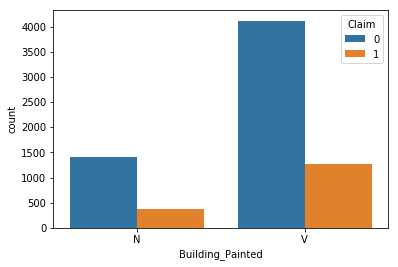

In [14]:
sns.countplot(train['Building_Painted'], hue='Claim', data=train)

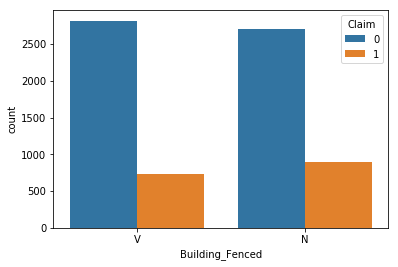

In [15]:
sns.countplot(train['Building_Fenced'], hue='Claim', data=train)

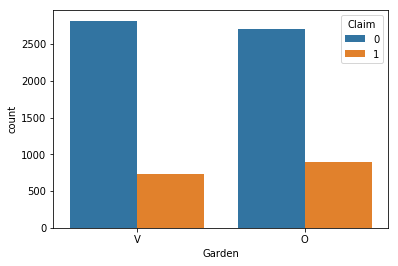

In [16]:
sns.countplot(train['Garden'], hue='Claim', data=train)

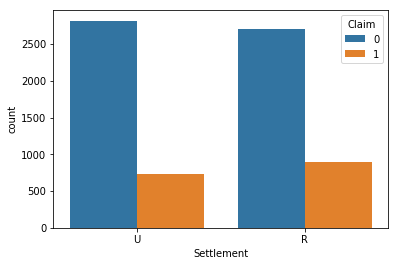

In [17]:
sns.countplot(train['Settlement'], hue='Claim', data=train)

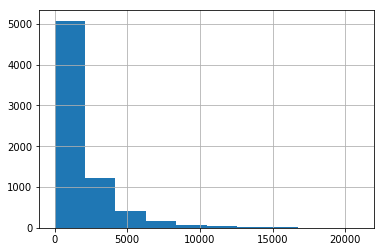

In [18]:
train['Building Dimension'].hist()

In [19]:
test['Building_Fenced'].value_counts(dropna=False)

V    2240
N     829
Name: Building_Fenced, dtype: int64

In [20]:
test['Building_Painted'].value_counts(dropna=False)

V    1684
N    1385
Name: Building_Painted, dtype: int64

In [21]:
train['Residential'].value_counts(dropna=False)

0    4973
1    2187
Name: Residential, dtype: int64

In [22]:
test['Residential'].value_counts(dropna=False)

0    2381
1     688
Name: Residential, dtype: int64

In [23]:
train['Garden'].value_counts(dropna=False)

O      3602
V      3551
NaN       7
Name: Garden, dtype: int64

In [24]:
test['Garden'].value_counts(dropna=False)

V      2240
O       825
NaN       4
Name: Garden, dtype: int64

In [25]:
train['Building Dimension'].value_counts

<bound method IndexOpsMixin.value_counts of 0        290.0
1        490.0
2        595.0
3       2840.0
4        680.0
         ...  
7155       NaN
7156       NaN
7157       NaN
7158       NaN
7159       NaN
Name: Building Dimension, Length: 7160, dtype: float64>

In [26]:
test['Building Dimension'].value_counts()

400.0      68
450.0      67
300.0      62
350.0      61
600.0      58
           ..
61.0        1
508.0       1
13028.0     1
313.0       1
2205.0      1
Name: Building Dimension, Length: 982, dtype: int64

In [27]:
train['Date_of_Occupancy'].value_counts()

1960.0    1818
1980.0    1155
1988.0     530
1900.0     371
1970.0     285
          ... 
1908.0       1
1946.0       1
1939.0       1
1931.0       1
1927.0       1
Name: Date_of_Occupancy, Length: 134, dtype: int64

In [28]:
test['Geo_Code'].value_counts()

6083     113
6088      95
2B033     74
13206     68
13204     61
        ... 
67268      1
77057      1
54549      1
13019      1
14117      1
Name: Geo_Code, Length: 697, dtype: int64

In [29]:
train['Geo_Code'].value_counts().to_frame()

,Geo_Code
6088,143
33063,137
6083,113
13206,98
31555,87
...,...
69290,1
57430,1
91044,1
83130,1


In [30]:
train.Garden.fillna(train['Garden'].mode()[0], inplace =True)
test.Garden.fillna(test['Garden'].mode()[0], inplace =True)

In [31]:
test['Garden'].value_counts(dropna=False)

V    2244
O     825
Name: Garden, dtype: int64

In [32]:
train.Geo_Code.fillna(train['Geo_Code'].mode()[0], inplace =True)
test.Geo_Code.fillna(test['Geo_Code'].mode()[0], inplace =True)

In [33]:
test['Geo_Code'].isna().sum()

0

In [34]:
train['Building Dimension'].fillna(train['Building Dimension'].mode()[0], inplace =True)
test['Building Dimension'].fillna(test['Building Dimension'].mode()[0], inplace =True)

In [35]:
train['Building Dimension'].isna().sum()

0

In [36]:
train['Date_of_Occupancy'].fillna(train['Date_of_Occupancy'].mode()[0], inplace =True)
test['Date_of_Occupancy'].fillna(test['Date_of_Occupancy'].mode()[0], inplace =True)

In [37]:
train['Date_of_Occupancy'].isna().sum()

0

In [38]:
train.YearOfObservation.unique()

array([2013, 2015, 2014, 2012, 2016], dtype=int64)

In [39]:
from datetime import date
import datetime
pd.Timestamp('now').year

2019

In [40]:
train['Occupancy_duration'] = pd.Timestamp('now').year - train['Date_of_Occupancy']
test['Occupancy_duration'] = pd.Timestamp('now').year - test['Date_of_Occupancy']

In [41]:
train.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim,Occupancy_duration
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0,59.0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0,169.0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0,59.0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0,59.0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0,219.0


In [42]:
train['NumberOfWindows'].unique()

array(['   .', '4', '3', '2', '5', '>=10', '6', '7', '9', '8', '1'],
      dtype=object)

In [43]:
train['NumberOfWindows'].replace({'>=10':'10'}, inplace = True)
train['NumberOfWindows'].unique()

array(['   .', '4', '3', '2', '5', '10', '6', '7', '9', '8', '1'],
      dtype=object)

In [44]:
test['NumberOfWindows'].replace({'>=10':'10'}, inplace = True)
test['NumberOfWindows'].unique()

array(['3', '   .', '2', '4', '9', '5', '6', '8', '10', '7', '1'],
      dtype=object)

In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 15 columns):
Customer Id           7160 non-null object
YearOfObservation     7160 non-null int64
Insured_Period        7160 non-null float64
Residential           7160 non-null int64
Building_Painted      7160 non-null object
Building_Fenced       7160 non-null object
Garden                7160 non-null object
Settlement            7160 non-null object
Building Dimension    7160 non-null float64
Building_Type         7160 non-null int64
Date_of_Occupancy     7160 non-null float64
NumberOfWindows       7160 non-null object
Geo_Code              7160 non-null object
Claim                 7160 non-null int64
Occupancy_duration    7160 non-null float64
dtypes: float64(4), int64(4), object(7)
memory usage: 839.2+ KB


In [46]:
test.dtypes

Customer Id            object
YearOfObservation       int64
Insured_Period        float64
Residential             int64
Building_Painted       object
Building_Fenced        object
Garden                 object
Settlement             object
Building Dimension    float64
Building_Type           int64
Date_of_Occupancy     float64
NumberOfWindows        object
Geo_Code               object
Occupancy_duration    float64
dtype: object

In [47]:
train.dtypes

Customer Id            object
YearOfObservation       int64
Insured_Period        float64
Residential             int64
Building_Painted       object
Building_Fenced        object
Garden                 object
Settlement             object
Building Dimension    float64
Building_Type           int64
Date_of_Occupancy     float64
NumberOfWindows        object
Geo_Code               object
Claim                   int64
Occupancy_duration    float64
dtype: object

In [48]:
train['YearOfObservation'].value_counts()

2012    1858
2013    1811
2014    1373
2015    1075
2016    1043
Name: YearOfObservation, dtype: int64

In [49]:
test['YearOfObservation'] = test['YearOfObservation'].replace({0:2011})
train['YearOfObservation'] = train['YearOfObservation'].replace({0:2011})

In [50]:
test['Observed_years'] = pd.Timestamp('now').year - test['YearOfObservation']
train['Observed_years'] = pd.Timestamp('now').year - train['YearOfObservation']

In [51]:
train['Observed_years'].unique()

array([6, 4, 5, 7, 3], dtype=int64)

In [52]:
def insurance_fxn(x):
    if x >= 0.800:
        return 'one year'
    elif x >= 0.490 and x < 0.800:
        return 'half a year'
    else:
        return 'quarter'

In [53]:
train['insurance_duration'] = train['Insured_Period'].apply(insurance_fxn)
#train['Insured_Period'].unique()

In [54]:
def insurance_fxn(x):
    if x >= 0.800:
        return 'one year'
    elif x >= 0.490 and x < 0.800:
        return 'half a year'
    else:
        return 'quarter'

In [55]:
test['insurance_duration'] = test['Insured_Period'].apply(insurance_fxn)

In [56]:
train['Claim'].value_counts()

0    5526
1    1634
Name: Claim, dtype: int64

In [57]:
from sklearn.preprocessing import LabelEncoder
labelencoder_test = LabelEncoder()
test['Garden'] = labelencoder_test.fit_transform(test['Garden'])

In [58]:
from sklearn.preprocessing import LabelEncoder
labelencoder_train = LabelEncoder()
train['Garden'] = labelencoder_train.fit_transform(train['Garden'])

In [59]:
from sklearn.preprocessing import LabelEncoder
labelencoder_test = LabelEncoder()
test['Building_Fenced'] = labelencoder_test.fit_transform(test['Building_Fenced'])

In [60]:
from sklearn.preprocessing import LabelEncoder
labelencoder_train = LabelEncoder()
train['Building_Fenced'] = labelencoder_train.fit_transform(train['Building_Fenced'])

In [61]:
from sklearn.preprocessing import LabelEncoder
labelencoder_test = LabelEncoder()
test['Building_Painted'] = labelencoder_test.fit_transform(test['Building_Painted'])

In [62]:
from sklearn.preprocessing import LabelEncoder
labelencoder_train = LabelEncoder()
train['Building_Painted'] = labelencoder_train.fit_transform(train['Building_Painted'])

In [63]:
from sklearn.preprocessing import LabelEncoder
labelencoder_train = LabelEncoder()
train['Settlement'] = labelencoder_train.fit_transform(train['Settlement'])

In [64]:
from sklearn.preprocessing import LabelEncoder
labelencoder_test = LabelEncoder()
test['Settlement'] = labelencoder_test.fit_transform(test['Settlement'])

In [65]:
train['ageing'] = train['YearOfObservation']-train['Date_of_Occupancy']
test['ageing'] = test['YearOfObservation']-test['Date_of_Occupancy']

In [66]:
def fifties(x):
    if x >= 50:
        return 0
    else:
        return 1
train['aged_50'] =train['ageing'].apply(fifties)

In [67]:
def fifties(x):
    if x >= 50:
        return 0
    else:
        return 1
test['aged_50'] =test['ageing'].apply(fifties)

In [68]:
X = train.drop(['Claim'], axis =1)
y = train.Claim

In [69]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 19 columns):
Customer Id           7160 non-null object
YearOfObservation     7160 non-null int64
Insured_Period        7160 non-null float64
Residential           7160 non-null int64
Building_Painted      7160 non-null int32
Building_Fenced       7160 non-null int32
Garden                7160 non-null int32
Settlement            7160 non-null int32
Building Dimension    7160 non-null float64
Building_Type         7160 non-null int64
Date_of_Occupancy     7160 non-null float64
NumberOfWindows       7160 non-null object
Geo_Code              7160 non-null object
Claim                 7160 non-null int64
Occupancy_duration    7160 non-null float64
Observed_years        7160 non-null int64
insurance_duration    7160 non-null object
ageing                7160 non-null float64
aged_50               7160 non-null int64
dtypes: float64(5), int32(4), int64(6), object(4)
memory usage: 951.1+ KB


In [70]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.15, random_state =42)

In [71]:
from catboost import CatBoostClassifier, Pool, cv
classifier = CatBoostClassifier()

In [72]:
cate_features_index = np.where(X.dtypes != float) [0]; cate_features_index

array([ 0,  1,  3,  4,  5,  6,  7,  9, 11, 12, 14, 15, 17], dtype=int64)

In [73]:
#classifier = CatBoostClassifier(iterations=1000, depth=7, learning_rate=0.04, eval_metric ='AUC',use_best_model=True, random_seed=42)
#classifier.fit(X,y,cat_features=cate_features_index,eval_set=(X,y))

In [74]:
classifier = CatBoostClassifier(iterations=1000, depth=4, learning_rate=0.1, eval_metric ='Accuracy',use_best_model=True, random_seed=42)
classifier.fit(X,y,cat_features=cate_features_index,eval_set=(X,y))

0:	learn: 0.7717877	test: 0.7717877	best: 0.7717877 (0)	total: 129ms	remaining: 2m 9s
1:	learn: 0.7723464	test: 0.7716480	best: 0.7717877 (0)	total: 191ms	remaining: 1m 35s
2:	learn: 0.7747207	test: 0.7744413	best: 0.7744413 (2)	total: 269ms	remaining: 1m 29s
3:	learn: 0.7745810	test: 0.7743017	best: 0.7744413 (2)	total: 347ms	remaining: 1m 26s
4:	learn: 0.7738827	test: 0.7733240	best: 0.7744413 (2)	total: 436ms	remaining: 1m 26s
5:	learn: 0.7719274	test: 0.7717877	best: 0.7744413 (2)	total: 506ms	remaining: 1m 23s
6:	learn: 0.7733240	test: 0.7729050	best: 0.7744413 (2)	total: 568ms	remaining: 1m 20s
7:	learn: 0.7734637	test: 0.7731844	best: 0.7744413 (2)	total: 649ms	remaining: 1m 20s
8:	learn: 0.7772346	test: 0.7769553	best: 0.7769553 (8)	total: 726ms	remaining: 1m 19s
9:	learn: 0.7744413	test: 0.7736034	best: 0.7769553 (8)	total: 832ms	remaining: 1m 22s
10:	learn: 0.7745810	test: 0.7738827	best: 0.7769553 (8)	total: 912ms	remaining: 1m 21s
11:	learn: 0.7797486	test: 0.7790503	best: 

97:	learn: 0.7935754	test: 0.7920391	best: 0.7932961 (86)	total: 7.49s	remaining: 1m 8s
98:	learn: 0.7935754	test: 0.7920391	best: 0.7932961 (86)	total: 7.54s	remaining: 1m 8s
99:	learn: 0.7934358	test: 0.7921788	best: 0.7932961 (86)	total: 7.6s	remaining: 1m 8s
100:	learn: 0.7930168	test: 0.7921788	best: 0.7932961 (86)	total: 7.68s	remaining: 1m 8s
101:	learn: 0.7931564	test: 0.7920391	best: 0.7932961 (86)	total: 7.75s	remaining: 1m 8s
102:	learn: 0.7935754	test: 0.7930168	best: 0.7932961 (86)	total: 7.84s	remaining: 1m 8s
103:	learn: 0.7931564	test: 0.7927374	best: 0.7932961 (86)	total: 7.92s	remaining: 1m 8s
104:	learn: 0.7932961	test: 0.7927374	best: 0.7932961 (86)	total: 7.97s	remaining: 1m 7s
105:	learn: 0.7932961	test: 0.7927374	best: 0.7932961 (86)	total: 8.04s	remaining: 1m 7s
106:	learn: 0.7937151	test: 0.7930168	best: 0.7932961 (86)	total: 8.11s	remaining: 1m 7s
107:	learn: 0.7939944	test: 0.7928771	best: 0.7932961 (86)	total: 8.18s	remaining: 1m 7s
108:	learn: 0.7941341	tes

190:	learn: 0.7986034	test: 0.7951117	best: 0.7963687 (189)	total: 14.1s	remaining: 59.6s
191:	learn: 0.7990223	test: 0.7955307	best: 0.7963687 (189)	total: 14.1s	remaining: 59.5s
192:	learn: 0.7987430	test: 0.7956704	best: 0.7963687 (189)	total: 14.2s	remaining: 59.4s
193:	learn: 0.7990223	test: 0.7952514	best: 0.7963687 (189)	total: 14.3s	remaining: 59.2s
194:	learn: 0.7987430	test: 0.7956704	best: 0.7963687 (189)	total: 14.3s	remaining: 59.1s
195:	learn: 0.7987430	test: 0.7956704	best: 0.7963687 (189)	total: 14.4s	remaining: 59s
196:	learn: 0.7987430	test: 0.7956704	best: 0.7963687 (189)	total: 14.5s	remaining: 58.9s
197:	learn: 0.7987430	test: 0.7959497	best: 0.7963687 (189)	total: 14.5s	remaining: 58.8s
198:	learn: 0.7987430	test: 0.7962291	best: 0.7963687 (189)	total: 14.6s	remaining: 58.8s
199:	learn: 0.7988827	test: 0.7959497	best: 0.7963687 (189)	total: 14.7s	remaining: 58.7s
200:	learn: 0.7987430	test: 0.7958101	best: 0.7963687 (189)	total: 14.8s	remaining: 58.6s
201:	learn: 

282:	learn: 0.8013966	test: 0.7979050	best: 0.7979050 (270)	total: 21.4s	remaining: 54.2s
283:	learn: 0.8012570	test: 0.7977654	best: 0.7979050 (270)	total: 21.5s	remaining: 54.1s
284:	learn: 0.8012570	test: 0.7977654	best: 0.7979050 (270)	total: 21.5s	remaining: 54s
285:	learn: 0.8013966	test: 0.7977654	best: 0.7979050 (270)	total: 21.6s	remaining: 53.9s
286:	learn: 0.8013966	test: 0.7977654	best: 0.7979050 (270)	total: 21.7s	remaining: 53.9s
287:	learn: 0.8015363	test: 0.7977654	best: 0.7979050 (270)	total: 21.8s	remaining: 53.8s
288:	learn: 0.8019553	test: 0.7977654	best: 0.7979050 (270)	total: 21.8s	remaining: 53.7s
289:	learn: 0.8018156	test: 0.7979050	best: 0.7979050 (270)	total: 21.9s	remaining: 53.6s
290:	learn: 0.8016760	test: 0.7980447	best: 0.7980447 (290)	total: 22s	remaining: 53.6s
291:	learn: 0.8018156	test: 0.7981844	best: 0.7981844 (291)	total: 22.1s	remaining: 53.6s
292:	learn: 0.8018156	test: 0.7980447	best: 0.7981844 (291)	total: 22.2s	remaining: 53.5s
293:	learn: 0.

376:	learn: 0.8055866	test: 0.8001397	best: 0.8001397 (376)	total: 29.1s	remaining: 48.1s
377:	learn: 0.8054469	test: 0.8001397	best: 0.8001397 (376)	total: 29.2s	remaining: 48s
378:	learn: 0.8058659	test: 0.8001397	best: 0.8001397 (376)	total: 29.3s	remaining: 48s
379:	learn: 0.8057263	test: 0.7998603	best: 0.8001397 (376)	total: 29.3s	remaining: 47.9s
380:	learn: 0.8057263	test: 0.7998603	best: 0.8001397 (376)	total: 29.4s	remaining: 47.8s
381:	learn: 0.8057263	test: 0.7998603	best: 0.8001397 (376)	total: 29.5s	remaining: 47.7s
382:	learn: 0.8060056	test: 0.8000000	best: 0.8001397 (376)	total: 29.5s	remaining: 47.6s
383:	learn: 0.8057263	test: 0.7998603	best: 0.8001397 (376)	total: 29.6s	remaining: 47.5s
384:	learn: 0.8055866	test: 0.7998603	best: 0.8001397 (376)	total: 29.7s	remaining: 47.4s
385:	learn: 0.8058659	test: 0.8000000	best: 0.8001397 (376)	total: 29.8s	remaining: 47.4s
386:	learn: 0.8062849	test: 0.7998603	best: 0.8001397 (376)	total: 29.9s	remaining: 47.3s
387:	learn: 0.

468:	learn: 0.8100559	test: 0.8012570	best: 0.8019553 (464)	total: 35.9s	remaining: 40.6s
469:	learn: 0.8100559	test: 0.8012570	best: 0.8019553 (464)	total: 36s	remaining: 40.5s
470:	learn: 0.8100559	test: 0.8012570	best: 0.8019553 (464)	total: 36s	remaining: 40.4s
471:	learn: 0.8100559	test: 0.8012570	best: 0.8019553 (464)	total: 36.1s	remaining: 40.4s
472:	learn: 0.8103352	test: 0.8012570	best: 0.8019553 (464)	total: 36.3s	remaining: 40.4s
473:	learn: 0.8101955	test: 0.8016760	best: 0.8019553 (464)	total: 36.4s	remaining: 40.4s
474:	learn: 0.8106145	test: 0.8018156	best: 0.8019553 (464)	total: 36.5s	remaining: 40.4s
475:	learn: 0.8106145	test: 0.8018156	best: 0.8019553 (464)	total: 36.7s	remaining: 40.4s
476:	learn: 0.8104749	test: 0.8011173	best: 0.8019553 (464)	total: 36.8s	remaining: 40.4s
477:	learn: 0.8104749	test: 0.8011173	best: 0.8019553 (464)	total: 37s	remaining: 40.4s
478:	learn: 0.8104749	test: 0.8009777	best: 0.8019553 (464)	total: 37.1s	remaining: 40.4s
479:	learn: 0.81

561:	learn: 0.8120112	test: 0.8020950	best: 0.8029330 (533)	total: 45.2s	remaining: 35.3s
562:	learn: 0.8118715	test: 0.8020950	best: 0.8029330 (533)	total: 45.3s	remaining: 35.2s
563:	learn: 0.8118715	test: 0.8019553	best: 0.8029330 (533)	total: 45.4s	remaining: 35.1s
564:	learn: 0.8117318	test: 0.8020950	best: 0.8029330 (533)	total: 45.5s	remaining: 35s
565:	learn: 0.8118715	test: 0.8023743	best: 0.8029330 (533)	total: 45.5s	remaining: 34.9s
566:	learn: 0.8115922	test: 0.8022346	best: 0.8029330 (533)	total: 45.6s	remaining: 34.8s
567:	learn: 0.8115922	test: 0.8027933	best: 0.8029330 (533)	total: 45.6s	remaining: 34.7s
568:	learn: 0.8117318	test: 0.8027933	best: 0.8029330 (533)	total: 45.7s	remaining: 34.6s
569:	learn: 0.8117318	test: 0.8027933	best: 0.8029330 (533)	total: 45.8s	remaining: 34.5s
570:	learn: 0.8118715	test: 0.8027933	best: 0.8029330 (533)	total: 45.9s	remaining: 34.5s
571:	learn: 0.8118715	test: 0.8027933	best: 0.8029330 (533)	total: 46s	remaining: 34.4s
572:	learn: 0.

653:	learn: 0.8127095	test: 0.8034916	best: 0.8037709 (609)	total: 52s	remaining: 27.5s
654:	learn: 0.8127095	test: 0.8034916	best: 0.8037709 (609)	total: 52.1s	remaining: 27.4s
655:	learn: 0.8127095	test: 0.8033520	best: 0.8037709 (609)	total: 52.2s	remaining: 27.4s
656:	learn: 0.8128492	test: 0.8033520	best: 0.8037709 (609)	total: 52.3s	remaining: 27.3s
657:	learn: 0.8129888	test: 0.8032123	best: 0.8037709 (609)	total: 52.4s	remaining: 27.2s
658:	learn: 0.8129888	test: 0.8032123	best: 0.8037709 (609)	total: 52.6s	remaining: 27.2s
659:	learn: 0.8125698	test: 0.8039106	best: 0.8039106 (659)	total: 52.7s	remaining: 27.1s
660:	learn: 0.8125698	test: 0.8039106	best: 0.8039106 (659)	total: 52.8s	remaining: 27.1s
661:	learn: 0.8125698	test: 0.8039106	best: 0.8039106 (659)	total: 52.9s	remaining: 27s
662:	learn: 0.8125698	test: 0.8039106	best: 0.8039106 (659)	total: 53.1s	remaining: 27s
663:	learn: 0.8125698	test: 0.8039106	best: 0.8039106 (659)	total: 53.3s	remaining: 27s
664:	learn: 0.8125

748:	learn: 0.8141061	test: 0.8047486	best: 0.8050279 (729)	total: 1m 3s	remaining: 21.1s
749:	learn: 0.8139665	test: 0.8047486	best: 0.8050279 (729)	total: 1m 3s	remaining: 21.1s
750:	learn: 0.8141061	test: 0.8047486	best: 0.8050279 (729)	total: 1m 3s	remaining: 21s
751:	learn: 0.8142458	test: 0.8047486	best: 0.8050279 (729)	total: 1m 3s	remaining: 20.9s
752:	learn: 0.8142458	test: 0.8047486	best: 0.8050279 (729)	total: 1m 3s	remaining: 20.8s
753:	learn: 0.8142458	test: 0.8047486	best: 0.8050279 (729)	total: 1m 3s	remaining: 20.7s
754:	learn: 0.8143855	test: 0.8047486	best: 0.8050279 (729)	total: 1m 3s	remaining: 20.6s
755:	learn: 0.8143855	test: 0.8050279	best: 0.8050279 (729)	total: 1m 3s	remaining: 20.5s
756:	learn: 0.8142458	test: 0.8048883	best: 0.8050279 (729)	total: 1m 3s	remaining: 20.4s
757:	learn: 0.8148045	test: 0.8051676	best: 0.8051676 (757)	total: 1m 3s	remaining: 20.3s
758:	learn: 0.8148045	test: 0.8051676	best: 0.8051676 (757)	total: 1m 3s	remaining: 20.3s
759:	learn: 

842:	learn: 0.8167598	test: 0.8041899	best: 0.8055866 (798)	total: 1m 11s	remaining: 13.3s
843:	learn: 0.8167598	test: 0.8043296	best: 0.8055866 (798)	total: 1m 11s	remaining: 13.2s
844:	learn: 0.8167598	test: 0.8043296	best: 0.8055866 (798)	total: 1m 11s	remaining: 13.1s
845:	learn: 0.8167598	test: 0.8043296	best: 0.8055866 (798)	total: 1m 11s	remaining: 13s
846:	learn: 0.8167598	test: 0.8044693	best: 0.8055866 (798)	total: 1m 11s	remaining: 12.9s
847:	learn: 0.8167598	test: 0.8041899	best: 0.8055866 (798)	total: 1m 11s	remaining: 12.8s
848:	learn: 0.8167598	test: 0.8043296	best: 0.8055866 (798)	total: 1m 11s	remaining: 12.8s
849:	learn: 0.8167598	test: 0.8044693	best: 0.8055866 (798)	total: 1m 11s	remaining: 12.7s
850:	learn: 0.8170391	test: 0.8043296	best: 0.8055866 (798)	total: 1m 11s	remaining: 12.6s
851:	learn: 0.8168994	test: 0.8043296	best: 0.8055866 (798)	total: 1m 11s	remaining: 12.5s
852:	learn: 0.8167598	test: 0.8046089	best: 0.8055866 (798)	total: 1m 12s	remaining: 12.4s
8

934:	learn: 0.8184358	test: 0.8050279	best: 0.8055866 (798)	total: 1m 18s	remaining: 5.47s
935:	learn: 0.8182961	test: 0.8048883	best: 0.8055866 (798)	total: 1m 18s	remaining: 5.38s
936:	learn: 0.8181564	test: 0.8048883	best: 0.8055866 (798)	total: 1m 18s	remaining: 5.3s
937:	learn: 0.8180168	test: 0.8048883	best: 0.8055866 (798)	total: 1m 18s	remaining: 5.21s
938:	learn: 0.8181564	test: 0.8047486	best: 0.8055866 (798)	total: 1m 18s	remaining: 5.13s
939:	learn: 0.8181564	test: 0.8047486	best: 0.8055866 (798)	total: 1m 19s	remaining: 5.04s
940:	learn: 0.8181564	test: 0.8050279	best: 0.8055866 (798)	total: 1m 19s	remaining: 4.96s
941:	learn: 0.8180168	test: 0.8050279	best: 0.8055866 (798)	total: 1m 19s	remaining: 4.88s
942:	learn: 0.8180168	test: 0.8050279	best: 0.8055866 (798)	total: 1m 19s	remaining: 4.79s
943:	learn: 0.8180168	test: 0.8050279	best: 0.8055866 (798)	total: 1m 19s	remaining: 4.7s
944:	learn: 0.8177374	test: 0.8050279	best: 0.8055866 (798)	total: 1m 19s	remaining: 4.62s
9

In [75]:
pred = classifier.predict_proba(test)[:, 1].round(4)

In [76]:
x_final =pd.DataFrame({'Customer Id': test['Customer Id']})
y_final = pd.DataFrame ({'Claim' :pred})

In [77]:
submission = pd.concat([x_final, y_final], axis ='columns')
submission.head()

,Customer Id,Claim
0,H11920,0.0891
1,H11921,0.0777
2,H9805,0.0839
3,H7493,0.1446
4,H7494,0.1283


In [78]:
submission.to_csv('axa8.csv', index =False)